## Customer Segmentation

Goal -> To Segmentate the custormer based on the features of annual income and spending amount of the customers

we're include,

1. Data collection
2. Model Training(choosing best cluster,k-means algorithm)
3. Model Visualization
4. Project Interpretation

In [1]:
# Import the dependencies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

### Data Collection

In [2]:
# Loading the dataset
df = pd.read_csv('Datasets\Mall_Customers.csv')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Admin\AppData\Local\Temp\ipykernel_13632\3493879079.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('Datasets\Mall_Customers.csv')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Choosing the Annual Income and Spending Score

In [5]:
X = df.iloc[:, [3, 4]].values

In [6]:
print(X[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


Choosing the Number of cluster

WCSS -> Within cluster sum of squares


In [8]:
# Finding wcss values for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


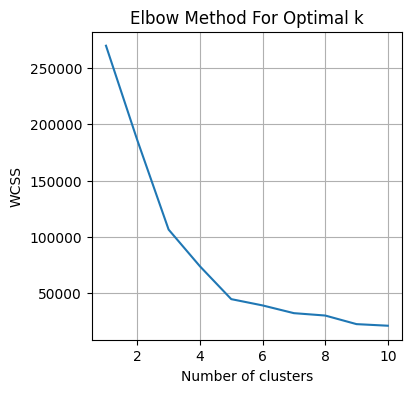

In [12]:
# plot the elbow graph
plt.figure(figsize=(4,4))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Interpretation -> from the elbow graph the cluster point 5 as optimal because there is not inflation or defaltion after the point 5

Optimum Number of Clusters = 5

5 clusters = 0,1,2,3,4

Training the k-Means Clustering Model

In [18]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y= kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


### Visualizing all the clusters

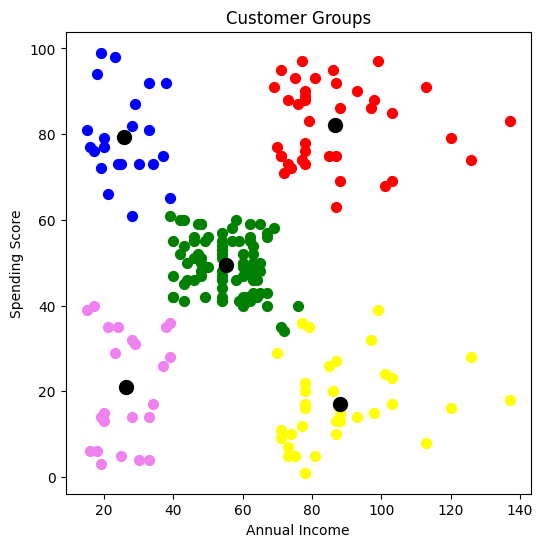

In [21]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Cluster-wise Insights:

--> Red Cluster (Top-right)

1. High income, high spending.

2. Likely premium customers or loyal high spenders.

3. Ideal for exclusive offers, loyalty programs, or luxury products.

--> Yellow Cluster (Bottom-right)

1. High income, low spending.

2. These are conservative spenders or potential customers not yet engaged.

3. Target with personalized promotions or engagement campaigns.

--> Blue Cluster (Top-left)

1. Low income, high spending.

2. These might be young spenders or deal seekers.

3. Focus on discount-based marketing or value-driven offers.

--> Purple Cluster (Bottom-left)

1. Low income, low spending.

2. Possibly less engaged customers or infrequent shoppers.

3. Consider budget-friendly strategies or low-cost product suggestions.

--> Green Cluster (Center)

1. Average income, average spending.

2. These are moderate customers, forming the core customer base.

3. Maintain engagement through standard promotions and regular updates.